In [1]:
import numpy as np
from time import sleep, time

In [2]:
import os

In [3]:
import tables

In [4]:
import pandas as pd

In [5]:
from scipy.interpolate import interp1d

In [6]:
from astropy.cosmology import FlatLambdaCDM, Planck18

In [7]:
import vrpy_tools

In [8]:
from gadget_tools import Snapshot, read_positions_all_files, read_partIDs_all_files

In [9]:
from pm_tools import assign_density, project_to_slice, Region, Transform

In [10]:
# import yt
# import numpy as np
# import yt.units as units
# import pylab
import sphviewer
from sphviewer.tools import QuickView

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [12]:
import yt
# import yt.units as units

/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:768: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [13]:
# 

In [14]:
L=150
N = 256
i=20
rund='r2'

In [15]:
siminfo = vrpy_tools.ReadSimInfo(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18/{rund:s}/halos_vr_6d/out_{i:03d}")

In [16]:
config = vrpy_tools.ReadConfigInfo(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18/{rund:s}/halos_vr_6d/out_{i:03d}")

In [17]:
a = siminfo['ScaleFactor']
z = 1/a - 1
h = siminfo['h_val']
Om_m = siminfo['Omega_m']

In [18]:
p18py = Planck18

In [19]:
a**3

1.0

In [20]:
hal_vr_dict, N_hal_tot_vr = vrpy_tools.ReadPropertyFile(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18/{rund:s}/halos_vr_6d/out_{i:03d}", ibinary=2, isiminfo=False, iunitinfo=False, iconfiginfo=False)
hal_vr_all = pd.DataFrame.from_dict(hal_vr_dict)
hal_vr_all.set_index('ID', inplace=True)

In [21]:
massive_hali = hal_vr_all.Mass_BN98.argmax()

In [22]:
hal_vr_all.Mass_BN98.max()

235325.68340082004

In [23]:
# massive_hali = hal_vr_all.Mass_BN98.quantile(.95)

In [24]:
def idxquantile(s, q=0.5, *args, **kwargs):
    qv = s.quantile(q, *args, **kwargs)
    return (s.sort_values()[::-1] <= qv).idxmax()

In [374]:
massive_hali = idxquantile(hal_vr_all.Mass_BN98,0.98)
hal_vr_all.Mass_BN98[massive_hali]

4347.1717862351925

In [375]:
hal_vr_all.Mass_BN98.quantile(.98)

4351.2141694473285

In [376]:
np.log10(hal_vr_all.iloc[massive_hali].Mass_BN98)

3.5776756593249766

In [377]:
X = hal_vr_all.iloc[massive_hali].Xc

In [378]:
Y = hal_vr_all.iloc[massive_hali].Yc

In [379]:
Z = hal_vr_all.iloc[massive_hali ].Zc

In [380]:
R = hal_vr_all.iloc[massive_hali].Rvir
R

0.9228811273059369

In [381]:
fac = L/N

In [382]:
fac 

0.5859375

In [383]:
hal_vr_all.iloc[massive_hali].Xc/fac

136.49335232265787

In [384]:
hal_vr_all.iloc[massive_hali].Yc/fac

67.6391943190909

In [385]:
hal_vr_all.iloc[massive_hali].Zc/fac

255.56539687018687

In [386]:
hal_vr_all.iloc[massive_hali].Rvir/fac

1.5750504572687989

In [387]:
z_slc = int(hal_vr_all.iloc[massive_hali].Zc//fac)

In [388]:
z_slc 

255

In [389]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [390]:
%autoreload 2

In [391]:
# np.logical_and.reduce((posd[:,0]>X-loc_box*R), (posd[:,0]<X+loc_box*R), (posd[:,1]>Y-loc_box*R), (posd[:,1]<Y+loc_box*R), (posd[:,2]>Z-loc_box*R), (posd[:,2]<Z+loc_box*R))

In [392]:
loc_box = 4

In [393]:
proj_axis = 2

In [394]:
2*loc_box*R

7.383049018447495

In [395]:
hal_cen = np.array([X,Y,Z])
hal_cen

array([ 79.97657363,  39.63234042, 149.74534973])

In [396]:
snap_dmo = Snapshot(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18/{rund:s}/snaps/snapdir_{i:03d}/snapshot_{i:03d}.0")

In [397]:
region = Region('cube', cen=hal_cen,side=2*loc_box*R,box_size=snap_dmo.box_size)

In [398]:
# select_index = region.selectPrtcl(posd_dmo, engine='c++')
# posd_dmo_sele = region.shift_origin(posd_dmo[select_index])

In [399]:
# posd_dmo_sele+loc_box*R

In [400]:
# posd_dmo_sel

In [401]:
# select_index[0].shape

In [402]:
# seld_ind_dmo[0].shape

In [403]:
posd_dmo = read_positions_all_files(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18/{rund:s}/snaps/snapdir_{i:03d}/snapshot_{i:03d}", prtcl_type='Halo', downsample=1)

/scratch/cprem/sims/L150_N256_Cp18/r2/snaps/snapdir_020/snapshot_020.0.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L150_N256_Cp18/r2/snaps/snapdir_020/snapshot_020.1.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L150_N256_Cp18/r2/snaps/snapdir_020/snapshot_020.2.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L150_N256_Cp18/r2/snaps/snapdir_020/snapshot_020.3.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L150_N256_Cp18/r2/snaps/snapdir_020/snapshot_020.4.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L150_N256_Cp18/r2/snaps/snapdir_020/snapshot_020.5.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L150_N256_Cp18/r2/snaps/sn

In [404]:
# seld_ind_dmo = np.where((posd_dmo[:,0]>X-loc_box*R) & (posd_dmo[:,0]<X+loc_box*R) & (posd_dmo[:,1]>Y-loc_box*R) & (posd_dmo[:,1]<Y+loc_box*R) & (posd_dmo[:,2]>Z-loc_box*R) & (posd_dmo[:,2]<Z+loc_box*R))
# posd_dmo_sel = posd_dmo[seld_ind_dmo].copy()
# posd_dmo_sel -= np.array([X-loc_box*R,Y-loc_box*R,Z-loc_box*R])
# posd_dmo_sel.max()

In [405]:
pIDd_dmo = read_partIDs_all_files(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18/{rund:s}/snaps/snapdir_{i:03d}/snapshot_{i:03d}", prtcl_type='Halo', downsample=1)

/scratch/cprem/sims/L150_N256_Cp18/r2/snaps/snapdir_020/snapshot_020.0.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L150_N256_Cp18/r2/snaps/snapdir_020/snapshot_020.1.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L150_N256_Cp18/r2/snaps/snapdir_020/snapshot_020.2.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L150_N256_Cp18/r2/snaps/snapdir_020/snapshot_020.3.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L150_N256_Cp18/r2/snaps/snapdir_020/snapshot_020.4.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L150_N256_Cp18/r2/snaps/snapdir_020/snapshot_020.5.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L150_N256_Cp18/r2/snaps/sn

In [406]:
seld_ind_dmo = region.selectPrtcl(posd_dmo, engine='c++')
posd_dmo_sel = region.shift_origin(posd_dmo[seld_ind_dmo])
posd_dmo_sel_noneg = posd_dmo_sel + loc_box*R
posd_dmo_sel.max()


    selection bool array obtained
0.042021989822387695

    selection index array obtained
0.009938716888427734


3.6861384706106293

In [407]:
pid_zoom = pIDd_dmo[seld_ind_dmo]

In [408]:
# snap_dmo_ic = Snapshot(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18/{rund:s}/ics/monofonic_24.0")

In [409]:
# region_ic = Region('cube', cen=hal_cen,side=2*loc_box*R,box_size=snap_dmo.box_size)

In [410]:
posd_dmo_ic = read_positions_all_files(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18/{rund:s}/ics/monofonic_24.0", prtcl_type='Halo', downsample=1)

/scratch/cprem/sims/L150_N256_Cp18/r2/ics/monofonic_24.0.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L150_N256_Cp18/r2/ics/monofonic_24.0.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L150_N256_Cp18/r2/ics/monofonic_24.0.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L150_N256_Cp18/r2/ics/monofonic_24.0.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L150_N256_Cp18/r2/ics/monofonic_24.0.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L150_N256_Cp18/r2/ics/monofonic_24.0.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L150_N256_Cp18/r2/ics/monofonic_24.0.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to rea

In [411]:
pIDd_dmo_ic = read_partIDs_all_files(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18/{rund:s}/ics/monofonic_24.0", prtcl_type='Halo', downsample=1)

/scratch/cprem/sims/L150_N256_Cp18/r2/ics/monofonic_24.0.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L150_N256_Cp18/r2/ics/monofonic_24.0.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L150_N256_Cp18/r2/ics/monofonic_24.0.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L150_N256_Cp18/r2/ics/monofonic_24.0.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L150_N256_Cp18/r2/ics/monofonic_24.0.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L150_N256_Cp18/r2/ics/monofonic_24.0.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L150_N256_Cp18/r2/ics/monofonic_24.0.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to rea

In [412]:
pIDd_dmo_ic

array([      0,       1,       2, ..., 2097149, 2097150, 2097151],
      dtype=uint32)

In [413]:
# pd.DataFrame()

In [414]:
posd_zoom = posd_dmo_ic[pid_zoom]

In [415]:
posd_zoom.max(axis=0)

array([ 11.326885,  46.11736 , 149.75667 ], dtype=float32)

In [416]:
posd_zoom.min(axis=0)

array([ 7.7167525, 42.371456 ,  0.2569984], dtype=float32)

In [417]:
np.percentile(posd_zoom, [0,10,90,99,100], axis=0)

array([[  7.71675253,  42.37145615,   0.25699839],
       [  8.89776278,  43.01830521,   0.34434701],
       [ 11.19362631,  44.97865143, 149.66995697],
       [ 11.29589497,  45.70228939, 149.74809265],
       [ 11.32688522,  46.11735916, 149.75666809]])

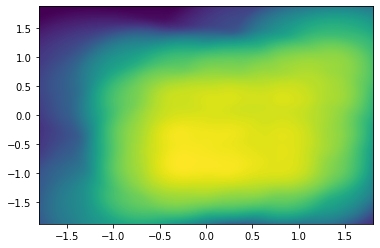

In [418]:
qv = QuickView(posd_zoom, r='infinity', nb=8)

In [419]:
dens_ics = assign_density(posd_zoom, snap_dmo.box_size, overdensity=False)

In [420]:
dens_ics_slice =  project_to_slice(dens_ics, snap_dmo.box_size, 1, 'centre', snap_dmo.box_size)


    slice index obtained
4.601478576660156e-05


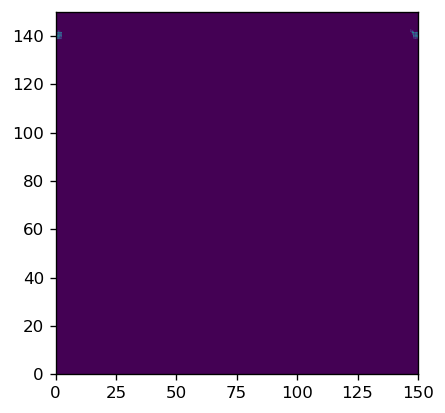

In [421]:
plt.figure(dpi=120)
plt.imshow(dens_ics_slice, extent=[0,150,0,150])

In [661]:
rhod_dmo = assign_density(posd_dmo_sel_noneg, 2*loc_box*R, scheme='TSC', overdensity=False, grid_size=512)
# rhod_dmo_slice = rhod_dmo.mean(axis=proj_axis)
rhod_dmo_slice = project_to_slice(rhod_dmo, snap_dmo.box_size, proj_axis, 'centre', 2*loc_box*R)


    slice index obtained
3.218650817871094e-05


In [662]:
# vars(snap_dmo)

In [663]:
snap = Snapshot(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18_bar/{rund:s}/snaps/snapdir_{i:03d}/snapshot_{i:03d}.0")

In [664]:
posd = read_positions_all_files(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18_bar/{rund:s}/snaps/snapdir_{i:03d}/snapshot_{i:03d}", prtcl_type='Halo', downsample=1)

/scratch/cprem/sims/L200_N256_Cp18_bar/r21/snaps/snapdir_012/snapshot_012.0.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L200_N256_Cp18_bar/r21/snaps/snapdir_012/snapshot_012.1.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L200_N256_Cp18_bar/r21/snaps/snapdir_012/snapshot_012.2.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L200_N256_Cp18_bar/r21/snaps/snapdir_012/snapshot_012.3.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L200_N256_Cp18_bar/r21/snaps/snapdir_012/snapshot_012.4.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L200_N256_Cp18_bar/r21/snaps/snapdir_012/snapshot_012.5.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/s

In [665]:
posb = read_positions_all_files(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18_bar/{rund:s}/snaps/snapdir_{i:03d}/snapshot_{i:03d}", prtcl_type='Gas', downsample=1)

/scratch/cprem/sims/L200_N256_Cp18_bar/r21/snaps/snapdir_012/snapshot_012.0.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L200_N256_Cp18_bar/r21/snaps/snapdir_012/snapshot_012.1.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L200_N256_Cp18_bar/r21/snaps/snapdir_012/snapshot_012.2.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L200_N256_Cp18_bar/r21/snaps/snapdir_012/snapshot_012.3.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L200_N256_Cp18_bar/r21/snaps/snapdir_012/snapshot_012.4.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/sims/L200_N256_Cp18_bar/r21/snaps/snapdir_012/snapshot_012.5.hdf5 True
Instantiated a snapshot object, use 'from_binary' method to read from binary.
/scratch/cprem/s

In [666]:
# seld_ind = np.where((posd[:,0]>X-loc_box*R) & (posd[:,0]<X+loc_box*R) & (posd[:,1]>Y-loc_box*R) & (posd[:,1]<Y+loc_box*R) & (posd[:,2]>Z-loc_box*R) & (posd[:,2]<Z+loc_box*R))
# posd_sel = posd[seld_ind].copy()
# posd_sel -= np.array([X-loc_box*R,Y-loc_box*R,Z-loc_box*R])
# posd_sel.max()

In [667]:
seld_ind = region.selectPrtcl(posd, engine='c++')
posd_sel = region.shift_origin(posd[seld_ind])
posd_sel_noneg = posd_sel + loc_box*R
posd_sel_noneg.max()


    selection bool array obtained
0.03509855270385742

    selection index array obtained
0.007203578948974609


6.357052172811578

In [668]:
rhod = assign_density(posd_sel_noneg, 2*loc_box*R, scheme='TSC', overdensity=False, grid_size=512)
# rhod_slice = rhod.mean(axis=proj_axis)
rhod_slice = project_to_slice(rhod, snap.box_size, proj_axis, 'centre', 2*loc_box*R)


    slice index obtained
3.2901763916015625e-05


In [669]:
# selb_ind = np.where((posb[:,0]>X-loc_box*R) & (posb[:,0]<X+loc_box*R) & (posb[:,1]>Y-loc_box*R) & (posb[:,1]<Y+loc_box*R) & (posb[:,2]>Z-loc_box*R) & (posb[:,2]<Z+loc_box*R))
# posb_sel = posb[selb_ind].copy()
# posb_sel -= np.array([X-loc_box*R,Y-loc_box*R,Z-loc_box*R])
# posb_sel.max()

In [670]:
selb_ind = region.selectPrtcl(posb, engine='c++')
posb_sel = region.shift_origin(posb[selb_ind])
posb_sel_noneg = posb_sel + loc_box*R
posb_sel_noneg.max()


    selection bool array obtained
0.03393197059631348

    selection index array obtained
0.006682872772216797


6.356809834687311

In [671]:
rhob = assign_density(posb_sel_noneg, 2*loc_box*R, scheme='TSC', overdensity=False)
rhob_slice = rhob.mean(axis=proj_axis)

In [672]:
# project_to_slice(rhob, snap.box_size, proj_axis, 'centre', 2*loc_box*R) == rhob_slice)

In [673]:
# rhod_slice

In [674]:
def find_peak_idx(arr):
    return np.unravel_index(arr.argmax(), arr.shape)
def find_peak(arr, extent_cube):
    indx = find_peak_idx(arr)
    return (np.array(indx)/arr.shape[0]) * (extent_cube[1]-extent_cube[0]) + extent_cube[0]

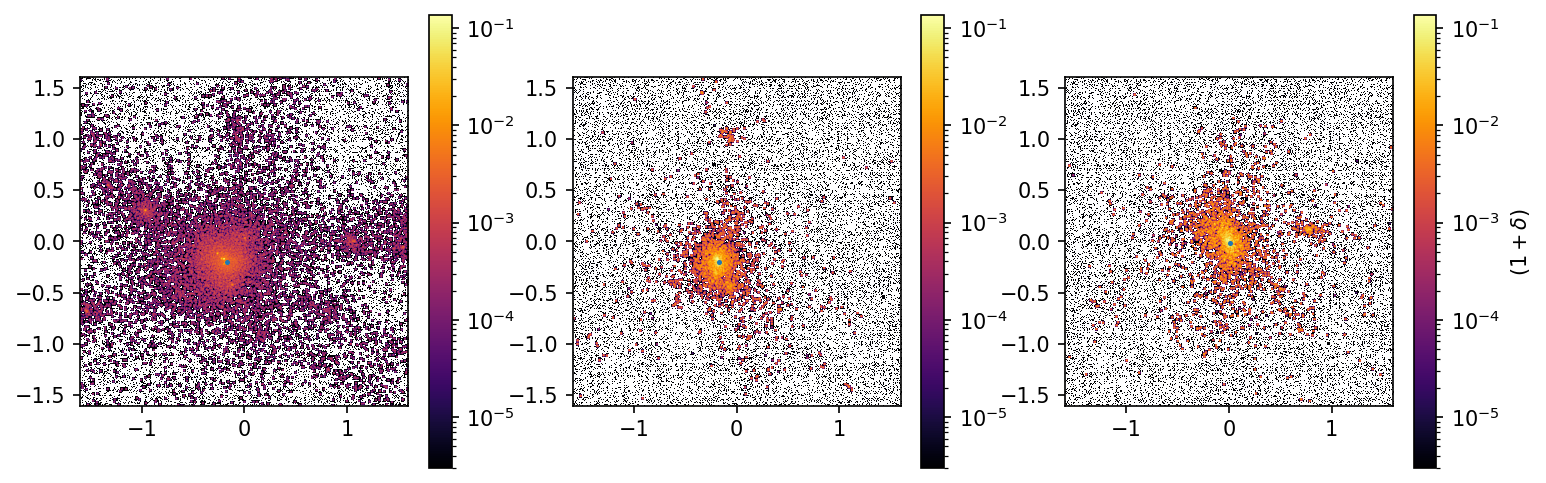

In [675]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(12,4), dpi=150)
im1 = ax1.imshow(rhob_slice, norm=LogNorm(vmin=3e-6), cmap='inferno', extent=[-loc_box,loc_box,-loc_box,loc_box], origin='lower')
ax1.scatter(*find_peak(rhob_slice,[-loc_box,loc_box]), s=2)
cb1 = fig.colorbar(im1,ax=ax1)
# cb1.set_label(r"$(1+\delta)$")
im2 = ax2.imshow(rhod_slice, norm=LogNorm(vmin=3e-6), cmap='inferno', extent=[-loc_box,loc_box,-loc_box,loc_box], origin='lower')
ax2.scatter(*find_peak(rhod_slice,[-loc_box,loc_box]), s=2)
cb2 = fig.colorbar(im1,ax=ax2)
# cb2.set_label(r"$(1+\delta)$")
im3 = ax3.imshow(rhod_dmo_slice, norm=LogNorm(vmin=3e-6), cmap='inferno', extent=[-loc_box,loc_box,-loc_box,loc_box], origin='lower')
ax3.scatter(*find_peak(rhod_dmo_slice,[-loc_box,loc_box]), s=2)
cb3 = fig.colorbar(im1,ax=ax3)
cb3.set_label(r"$(1+\delta)$")

<ipython-input-686-2cfd9ed5ea46>:2: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("nipy_spectral"))
  cmap.set_bad(color='black')


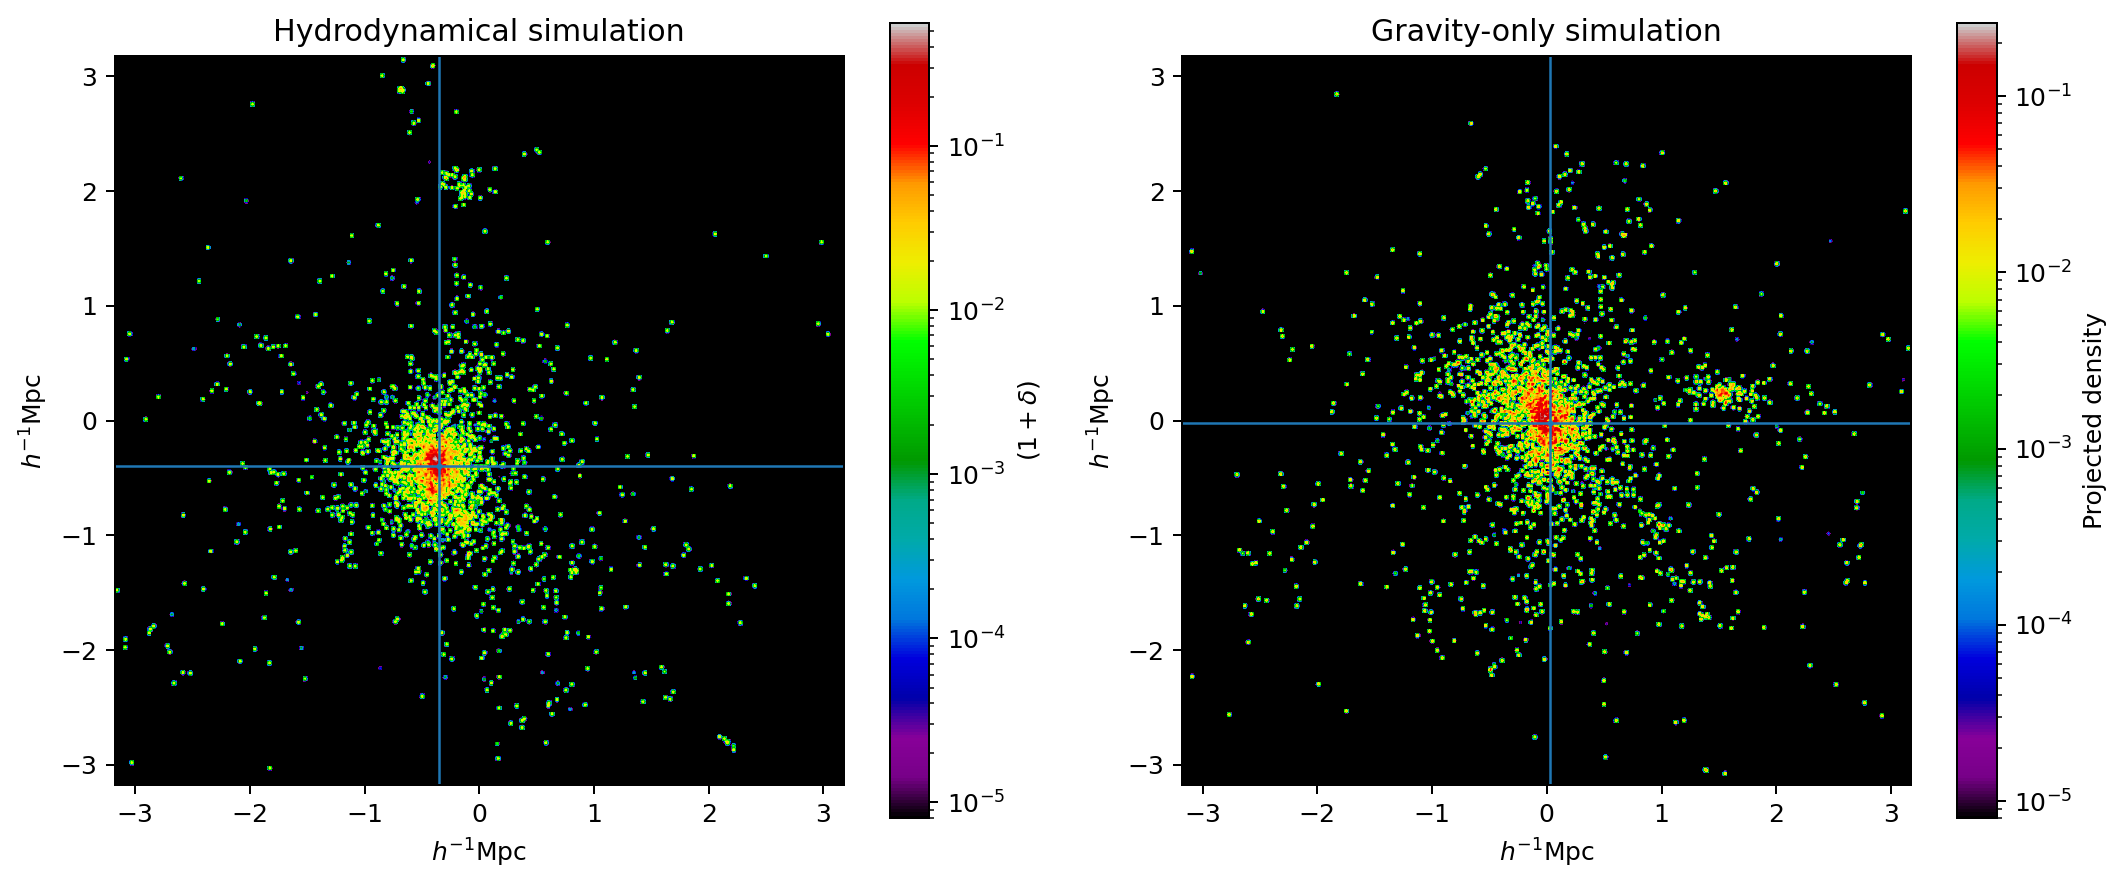

In [686]:
cmap = plt.cm.nipy_spectral
cmap.set_bad(color='black')
fig, (ax2,ax3) = plt.subplots(1,2, figsize=(12,5), dpi=180)
# im1 = ax1.imshow(rhob_slice, norm=LogNorm(vmin=3e-6), cmap='inferno', extent=[-loc_box,loc_box,-loc_box,loc_box], origin='lower')
# ax1.scatter(*find_peak(rhob_slice,[-loc_box,loc_box]), s=2)
# cb1 = fig.colorbar(im1,ax=ax1)
# cb1.set_label(r"$(1+\delta)$")
im2 = ax2.imshow(rhod_slice, norm=LogNorm(vmin=8e-6), cmap=cmap, extent=[-loc_box*R,loc_box*R,-loc_box*R,loc_box*R], origin='lower')
peakpos2 = find_peak(rhod_slice,[-loc_box*R,loc_box*R])
ax2.scatter(*peakpos2, s=2)
ax2.axhline(peakpos2[1], lw=1)
ax2.axvline(peakpos2[0], lw=1)
cb2 = fig.colorbar(im2,ax=ax2)
# cb2.set_label(r"$(1+\delta)$")
im3 = ax3.imshow(rhod_dmo_slice, norm=LogNorm(vmin=8e-6), cmap=cmap, extent=[-loc_box*R,loc_box*R,-loc_box*R,loc_box*R], origin='lower')
peakpos3 = find_peak(rhod_dmo_slice,[-loc_box*R,loc_box*R])
ax3.axhline(peakpos3[1], lw=1)
ax3.axvline(peakpos3[0], lw=1)
ax3.scatter(*peakpos3, s=2)
cb3 = fig.colorbar(im3,ax=ax3)
cb2.set_label(r"$(1+\delta)$")
cb3.set_label(r"Projected density")
ax2.set_xlabel(r'$h^{-1}$Mpc')
ax2.set_ylabel(r'$h^{-1}$Mpc')
ax3.set_xlabel(r'$h^{-1}$Mpc')
ax3.set_ylabel(r'$h^{-1}$Mpc')
ax3.set_title('Gravity-only simulation')
ax2.set_title('Hydrodynamical simulation')
plt.tight_layout()
fig.savefig('mmhalo_slice.pdf')

In [677]:
10**-1.5

0.03162277660168379

In [678]:
Rad_bin_edge_1 = np.linspace(0.005, .2e-1, 4)

In [679]:
Rad_bin_edge_2 = np.logspace(-1.4,np.log10(2*R),40)
Rad_bin_edge_2 = np.delete(Rad_bin_edge_2,[1,3,5,7])

In [680]:
# Rad_bin_edge = np.insert(Rad_bin_edge,0,0)
Rad_bin_edge_2

array([0.03981072, 0.05041043, 0.06383234, 0.08082787, 0.10234851,
       0.11517062, 0.12959908, 0.14583511, 0.16410518, 0.18466411,
       0.20779863, 0.23383142, 0.26312558, 0.29608967, 0.33318347,
       0.37492434, 0.42189447, 0.47474896, 0.534225  , 0.60115215,
       0.67646385, 0.76121053, 0.85657418, 0.96388488, 1.08463936,
       1.22052183, 1.37342751, 1.54548906, 1.73910629, 1.95697969,
       2.20214803, 2.4780308 , 2.78847588, 3.13781318, 3.5309151 ,
       3.9732644 ])

In [681]:
Rad_bin_edge = np.concatenate([Rad_bin_edge_1, Rad_bin_edge_2])

In [682]:
Rad_bin_edge.sort()

In [683]:
Rad_bin_cen = (Rad_bin_edge[1:] * Rad_bin_edge[:-1])**(1/2)

In [684]:
Rad_bin_cen

array([0.00707107, 0.01224745, 0.01732051, 0.02821727, 0.04479816,
       0.05672579, 0.07182919, 0.0909539 , 0.10857045, 0.12217204,
       0.13747762, 0.15470067, 0.17408141, 0.19589014, 0.22043105,
       0.24804642, 0.27912142, 0.31408945, 0.35343824, 0.39771661,
       0.44754213, 0.50360973, 0.56670143, 0.63769718, 0.71758721,
       0.80748578, 0.90864674, 1.02248104, 1.15057638, 1.29471938,
       1.45692045, 1.6394419 , 1.84482945, 2.07594773, 2.33602026,
       2.6286744 , 2.95799195, 3.32856605, 3.74556528])

In [685]:
vir_dens = config['Virial_density']*config['Critical_density']/p18py.Om(z)/ (h**2/a**3)*snap.mass_table[1]/snap_dmo.mass_table[1]

In [514]:
config['Critical_density']/ (h**2/a**3)

84993066794.41269

In [515]:
h**2/a**3

3.1482966720484162

In [516]:
vir_dens

17505421564849.322

In [517]:
find_peak(rhod_dmo_slice,[-loc_box,loc_box])

array([-0.06640625, -0.00390625])

In [518]:
posd_r = np.linalg.norm(posd_sel-find_peak(rhod,[-loc_box*R,loc_box*R]), axis=1)

In [519]:
mass_profile = np.histogram(posd_r, Rad_bin_edge)[0]* snap.mass_table[1]*1e10

In [520]:
# mass_profile

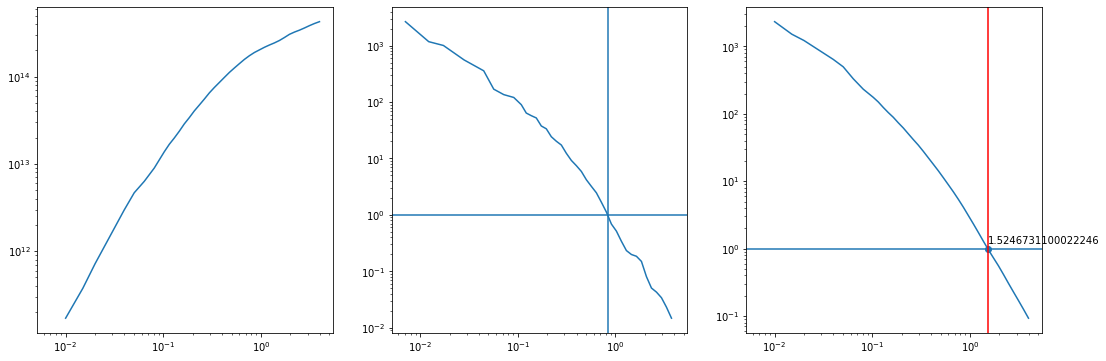

In [521]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(18,6), sharex=True)
ax1.loglog(Rad_bin_edge[1:], np.cumsum(mass_profile))
# ax1.set_xlim(1e-2,2)
rhor = mass_profile/ (4/3*np.pi* (Rad_bin_edge[1:]**3-Rad_bin_edge[:-1]**3) )/ vir_dens
r_rho_is_vir = interp1d(rhor, Rad_bin_cen)(1)
ax2.loglog(Rad_bin_cen, rhor,)
ax2.axhline(1)
ax2.axvline(r_rho_is_vir)
rhoR = np.cumsum(mass_profile)/ (4/3*np.pi* (Rad_bin_edge[1:]**3))/ vir_dens
r_vir = interp1d(rhoR, Rad_bin_edge[1:])(1)
#     idx_vir = np.argwhere(np.diff(np.sign(rhoR-1))).flatten()
ax3.loglog(Rad_bin_edge[1:], rhoR ,)
ax3.axhline(1)
ax3.axvline(r_vir,color='red')
# ax3.axvline(r_vir_vr_mean, color='green')
ax3.scatter(r_vir,1)
ax3.annotate(f'{r_vir}', (r_vir,1.2))
#     plt.ylim(0, 3)
plt.show()
sleep(.01)
plt.close()

In [522]:
posd_dmo_r = np.linalg.norm(posd_dmo_sel-find_peak(rhod_dmo,[-loc_box*R,loc_box*R]), axis=1)

In [523]:
mass_profile_dmo = np.histogram(posd_dmo_r, Rad_bin_edge)[0]* snap_dmo.mass_table[1]*1e10

In [524]:
# mass_profile_dmo

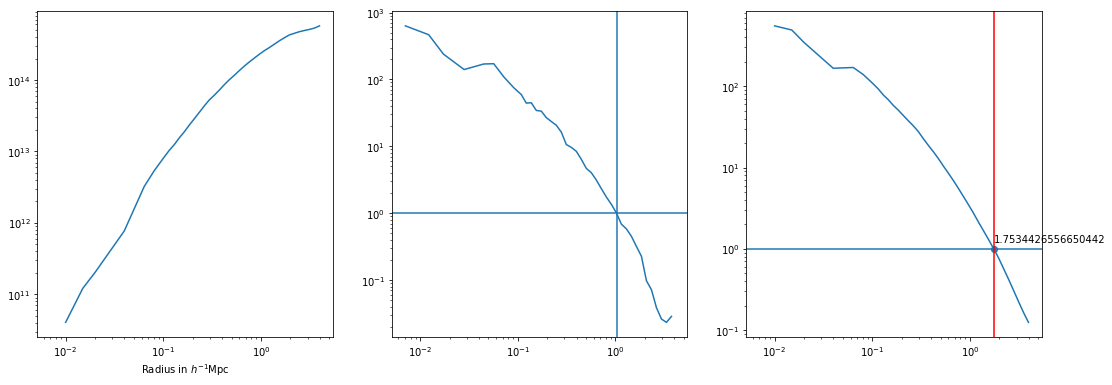

In [525]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(18,6), sharex=True)
ax1.loglog(Rad_bin_edge[1:], np.cumsum(mass_profile_dmo))
# ax1.set_xlim(1e-2,2)
ax1.set_xlabel('Radius in $h^{-1}$Mpc')
rhor = mass_profile_dmo/ (4/3*np.pi* (Rad_bin_edge[1:]**3-Rad_bin_edge[:-1]**3) )/ vir_dens
r_rho_is_vir = interp1d(rhor, Rad_bin_cen)(1)
ax2.loglog(Rad_bin_cen, rhor,)
ax2.axhline(1)
ax2.axvline(r_rho_is_vir)
rhoR = np.cumsum(mass_profile_dmo)/ (4/3*np.pi* (Rad_bin_edge[1:]**3))/ vir_dens
r_vir = interp1d(rhoR, Rad_bin_edge[1:])(1)
#     idx_vir = np.argwhere(np.diff(np.sign(rhoR-1))).flatten()
ax3.loglog(Rad_bin_edge[1:], rhoR ,)
ax3.axhline(1)
ax3.axvline(r_vir,color='red')
# ax3.axvline(r_vir_vr_mean, color='green')
ax3.scatter(r_vir,1)
ax3.annotate(f'{r_vir}', (r_vir,1.2))
#     plt.ylim(0, 3)
plt.show()
# sleep(.01)
plt.close()

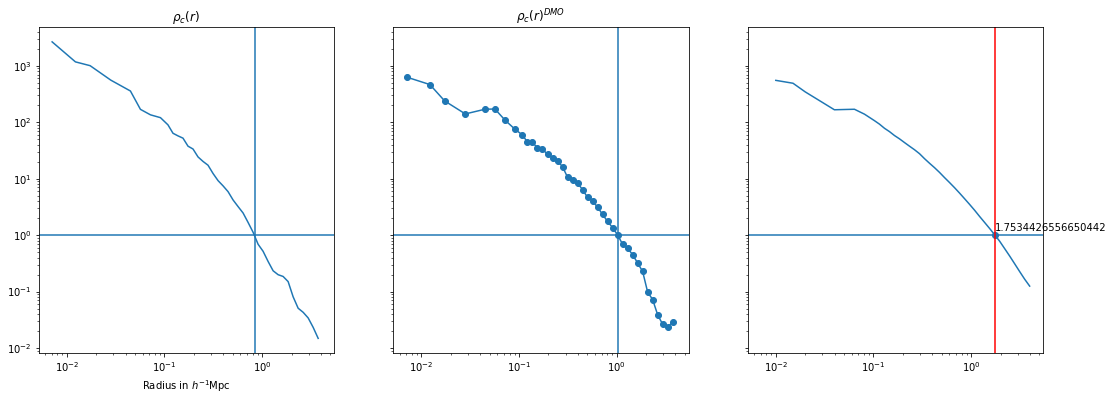

In [526]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(18,6), sharex=True, sharey=True)
# ax1.loglog(Rad_bin_edge[1:], np.cumsum(mass_profile_dmo))
# ax1.set_xlim(1e-2,2)
rhor = mass_profile/ (4/3*np.pi* (Rad_bin_edge[1:]**3-Rad_bin_edge[:-1]**3) )/ vir_dens
r_rho_is_vir = interp1d(rhor, Rad_bin_cen)(1)
ax1.loglog(Rad_bin_cen, rhor,)
ax1.axhline(1)
ax1.axvline(r_rho_is_vir)
ax1.set_xlabel('Radius in $h^{-1}$Mpc')
ax1.set_title(r'$\rho_{c}(r)$')
rhor_dmo = mass_profile_dmo/ (4/3*np.pi* (Rad_bin_edge[1:]**3-Rad_bin_edge[:-1]**3) )/ vir_dens
r_rho_dmo_is_vir = interp1d(rhor_dmo, Rad_bin_cen)(1)
ax2.loglog(Rad_bin_cen, rhor_dmo, marker='o')
ax2.axhline(1)
ax2.axvline(r_rho_dmo_is_vir)
ax2.set_title(r'$\rho_{c}(r)^{DMO}$')
rhoR = np.cumsum(mass_profile_dmo)/ (4/3*np.pi* (Rad_bin_edge[1:]**3))/ vir_dens
r_vir = interp1d(rhoR, Rad_bin_edge[1:])(1)
#     idx_vir = np.argwhere(np.diff(np.sign(rhoR-1))).flatten()
ax3.loglog(Rad_bin_edge[1:], rhoR ,)
ax3.axhline(1)
ax3.axvline(r_vir,color='red')
# ax3.axvline(r_vir_vr_mean, color='green')
ax3.scatter(r_vir,1)
ax3.annotate(f'{r_vir}', (r_vir,1.2))
#     plt.ylim(0, 3)
plt.show()
# sleep(.01)
plt.close()

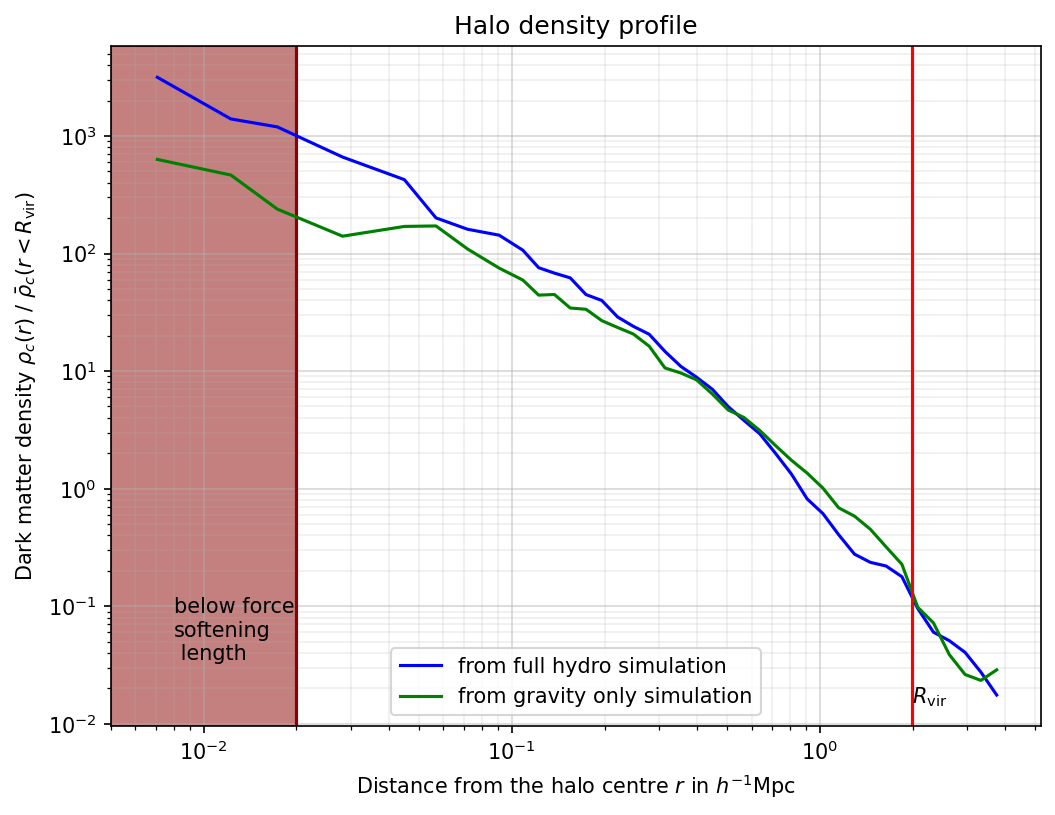

In [689]:
fig, ax1 = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=150)
rhor = mass_profile/ (4/3*np.pi* (Rad_bin_edge[1:]**3-Rad_bin_edge[:-1]**3) )/ vir_dens 
r_rho_is_vir = interp1d(rhor, Rad_bin_cen)(1)
ax1.axvspan(0.005,0.02, alpha=0.5, color='darkred')#, label='resolution limit')
ax1.axvline(0.02, color='darkred')
ax1.loglog(Rad_bin_cen, rhor, label=r'from full hydro simulation', c='b')
# ax1.axhline(1)
# ax1.axvline(r_rho_is_vir)
ax1.set_xlabel('Distance from the halo centre $r$ in $h^{-1}$Mpc')
# ax1.set_title(r'$\rho_{c}(r)$')
rhor_dmo = mass_profile_dmo/ (4/3*np.pi* (Rad_bin_edge[1:]**3-Rad_bin_edge[:-1]**3) )/ vir_dens *snap.mass_table[1]/snap_dmo.mass_table[1]
r_rho_dmo_is_vir = interp1d(rhor_dmo, Rad_bin_cen)(1)
ax1.loglog(Rad_bin_cen, rhor_dmo, label='from gravity only simulation', c='green')
# ax1.axhline(1, c='purple')
ax1.axvline(R, c='red')# label='Virial radius')
ax1.text(R,1.5e-2,r'$R_{\mathrm{vir}}$')
ax1.text(0.008, 3.5e-2, 'below force \nsoftening\n length')
# ax1.text(3e-2,1, 'Mean density within virial radius')
# ax2.axvline(r_rho_dmo_is_vir)
# ax2.set_title(r'$\rho_{c}(r)^{DMO}$')
ax1.set_ylabel(r'Dark matter density $\rho_{c}(r)$ / $\bar{\rho}_{c}(r<R_{\mathrm{vir}})$')
plt.legend()
# plt.close()
plt.grid(which='major', axis='both', alpha=0.5)
plt.grid(which='minor', axis='both', alpha=0.2)
ax1.set_title('Halo density profile')
ax1.set_xlim(left=0.005)
fig.savefig('dens_profile.pdf')

In [300]:
vir_dens

17505421564849.322

In [301]:
# posd_sel

In [302]:
# rhod.max()

In [120]:
exte = np.array([-2,3,-4,5,-6,7])

In [121]:
exte.reshape(3,2)

array([[-2,  3],
       [-4,  5],
       [-6,  7]])

In [122]:
find_peak(rhob_slice,[-2,2])

array([-0.171875, -0.203125])

In [123]:
np.unravel_index(rhob_slice.argmax(), rhob_slice.shape)

(234, 230)

In [88]:
rhob_slice[234,230]

0.19735149384081163

In [89]:
rhob_slice.max()

0.19735149384081163

In [171]:
deltad = assign_density(posd, L, scheme='CIC')#, overdensity=False)

In [172]:
# deltab = assign_density(posb, L, scheme='NGP')

In [173]:
deltad_slice = deltad[:,:,z_slc-2:z_slc+2].mean(axis=2)

In [174]:
# deltad_slice = deltad[:256]

In [175]:
# deltab_slice = deltab[100:150].mean(axis=0)

In [176]:
# deltad_slice

In [177]:
# vmin=5e-2,vmax=5e2, extent=[0,snap.box_size,0,snap.box_size]

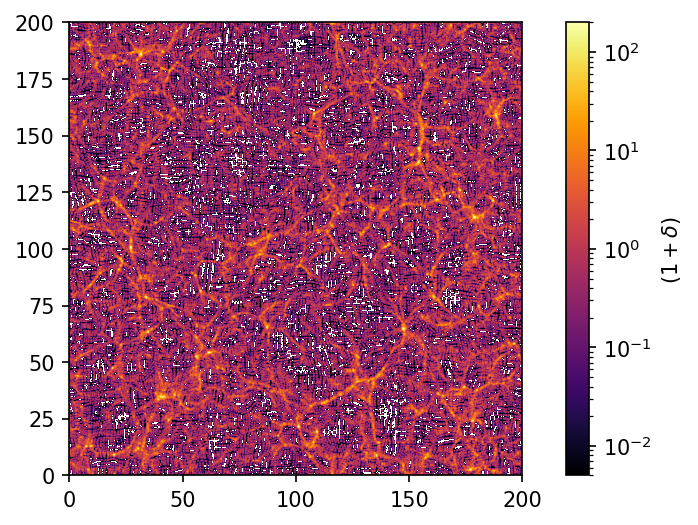

In [178]:
fig1, ax1 = plt.subplots(1,1, figsize=(7.5,4), dpi=150)
im1 = ax1.imshow(deltad_slice+1, norm=LogNorm(vmin=5e-3,vmax=2e2), cmap='inferno', extent=[0,snap.box_size,0,snap.box_size], origin='lower')
cb1 = fig1.colorbar(im1,ax=ax1)
cb1.set_label(r"$(1+\delta)$")

In [51]:
fname = f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18_bar/{rund:s}/snaps/snapdir_{i:03d}/snapshot_{i:03d}.0.hdf5"

In [52]:
unit_base = {'UnitLength_in_cm'         : 3.08568e+24,
             'UnitMass_in_g'            :   1.989e+43,
             'UnitVelocity_in_cm_per_s' :      100000}

bbox_lim = L #Mpc

bbox = [[0,bbox_lim],
        [0,bbox_lim],
        [0,bbox_lim]]
 
ds = yt.load(fname, unit_base=unit_base)#, bounding_box=bbox)#, cosmology_parameters={})
ds.index

yt : [INFO     ] 2021-05-04 13:23:47,221 Calculating time from 4.823e-01 to be 1.766e+17 seconds
yt : [INFO     ] 2021-05-04 13:23:47,250 Parameters: current_time              = 1.765662122310988e+17 s
yt : [INFO     ] 2021-05-04 13:23:47,251 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-05-04 13:23:47,252 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-05-04 13:23:47,253 Parameters: domain_right_edge         = [200. 200. 200.]
yt : [INFO     ] 2021-05-04 13:23:47,254 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2021-05-04 13:23:47,254 Parameters: current_redshift          = 1.0735799419483163
yt : [INFO     ] 2021-05-04 13:23:47,255 Parameters: omega_lambda              = 0.6936625
yt : [INFO     ] 2021-05-04 13:23:47,255 Parameters: omega_matter              = 0.3063375
yt : [INFO     ] 2021-05-04 13:23:47,256 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-05-04 13:23:47,257 Parameters: hubble_constant 

In [53]:
ad= ds.all_data()

In [54]:
ds.fields

In [ ]:
px1 = yt.SlicePlot(ds, 'z', ('deposit', 'PartType1_density'))

yt : [INFO     ] 2021-05-04 13:24:06,292 xlim = 0.000000 200.000000
yt : [INFO     ] 2021-05-04 13:24:06,293 ylim = 0.000000 200.000000
yt : [INFO     ] 2021-05-04 13:24:06,294 xlim = 0.000000 200.000000
yt : [INFO     ] 2021-05-04 13:24:06,295 ylim = 0.000000 200.000000
yt : [INFO     ] 2021-05-04 13:24:06,296 Making a fixed resolution buffer of (('deposit', 'PartType1_density')) 800 by 800


In [ ]:
px1.show()

/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] = other[key]
/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]


In [33]:
px2 = yt.SlicePlot(ds, 'z', ('gas', 'density'))

yt : [INFO     ] 2021-05-04 10:56:22,719 xlim = 0.000000 200.000000
yt : [INFO     ] 2021-05-04 10:56:22,721 ylim = 0.000000 200.000000
yt : [INFO     ] 2021-05-04 10:56:22,723 xlim = 0.000000 200.000000
yt : [INFO     ] 2021-05-04 10:56:22,724 ylim = 0.000000 200.000000
yt : [INFO     ] 2021-05-04 10:56:22,730 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] = other[key]
/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]



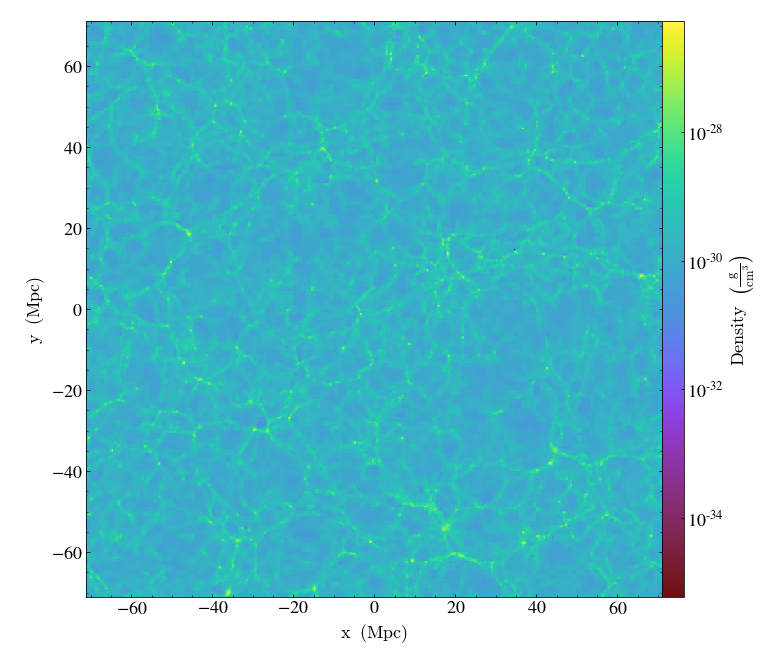

In [34]:
px2.show()

In [165]:
h

0.6781

In [166]:
a

0.526628

In [167]:
z

0.8988735881874872

In [168]:
fac = a/h

In [169]:
fac*200

155.32458339477952

In [170]:
px3 = yt.SlicePlot(ds, 'z', ('gas', 'density'), width=(3,3), origin='native', center=[ds.quan(X*fac, 'Mpc'), ds.quan(Y*fac, 'Mpc'), ds.quan(Z*fac, 'Mpc')])

NameError: name 'ds' is not defined

In [ ]:
px3.show()


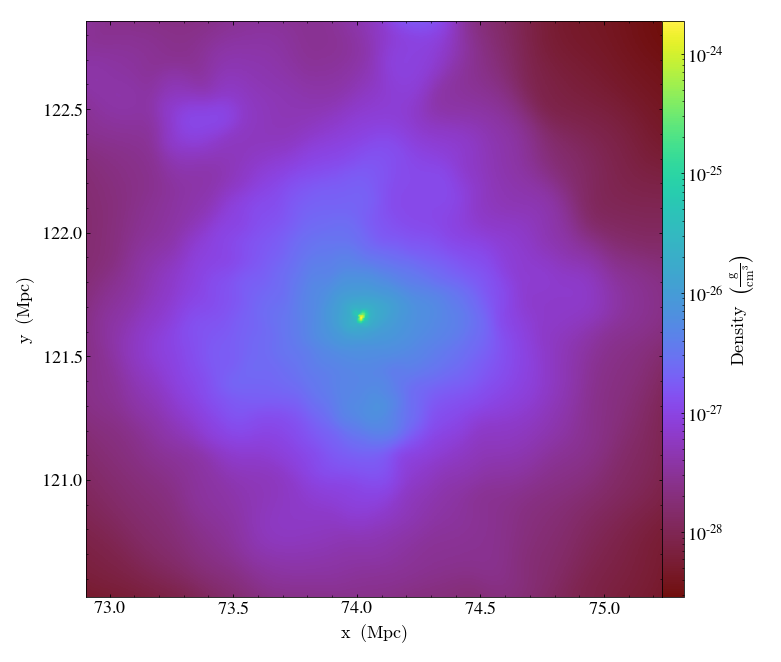

In [157]:
px3.show()


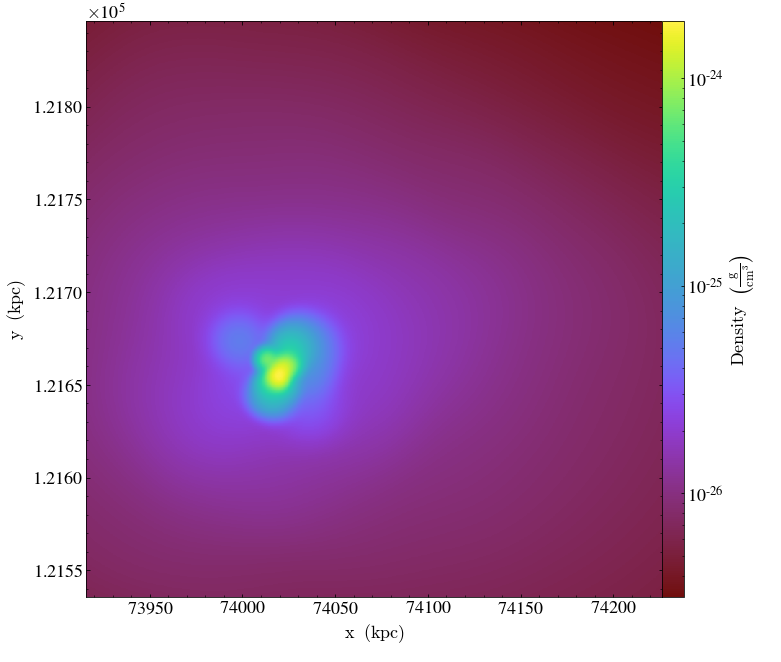

In [155]:
px3.show()

In [42]:
px4 = yt.SlicePlot(ds, 'z', ('deposit', 'PartType1_cic'), width=(5,5), origin='native', center=[ds.quan(X*fac, 'Mpc'), ds.quan(Y*fac, 'Mpc'), ds.quan(Z*fac, 'Mpc')])

yt : [INFO     ] 2021-05-04 10:59:27,526 xlim = 72.293183 75.849134
yt : [INFO     ] 2021-05-04 10:59:27,529 ylim = 119.912822 123.468773
yt : [INFO     ] 2021-05-04 10:59:27,531 xlim = 101.650971 106.650971
yt : [INFO     ] 2021-05-04 10:59:27,532 ylim = 168.608634 173.608634
yt : [INFO     ] 2021-05-04 10:59:27,535 Making a fixed resolution buffer of (('deposit', 'PartType1_cic')) 800 by 800


/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] = other[key]
/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]



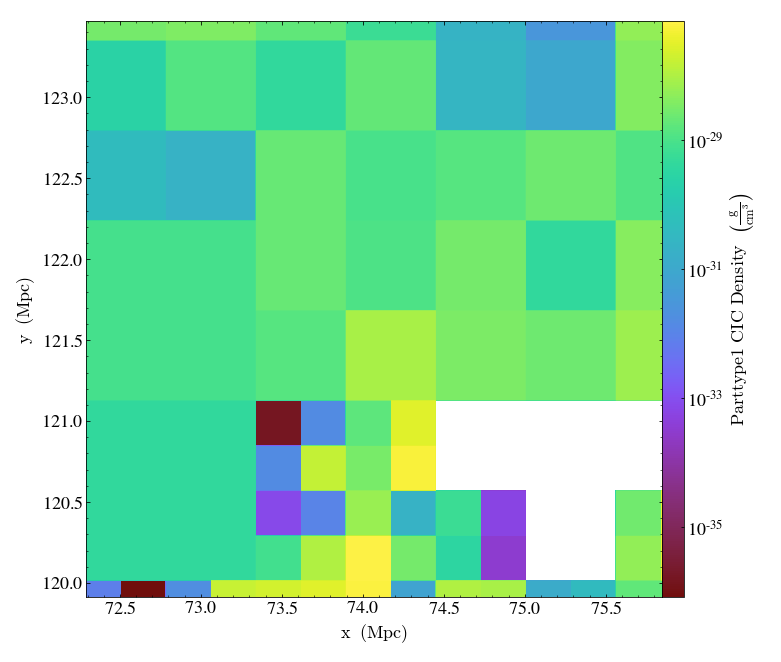

In [43]:
px4.show()

In [88]:
fname_dm = f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18/{rund:s}/snaps/snapdir_{i:03d}/snapshot_{i:03d}.0.hdf5"

In [89]:
unit_base = {'UnitLength_in_cm'         : 3.08568e+24,
             'UnitMass_in_g'            :   1.989e+43,
             'UnitVelocity_in_cm_per_s' :      100000}

bbox_lim = L #Mpc

bbox = [[0,bbox_lim],
        [0,bbox_lim],
        [0,bbox_lim]]
 
ds_dm = yt.load(fname, unit_base=unit_base)#, bounding_box=bbox)#, cosmology_parameters={})
ds_dm.index

yt : [INFO     ] 2021-05-04 00:35:12,893 Calculating time from 5.266e-01 to be 1.994e+17 seconds
yt : [INFO     ] 2021-05-04 00:35:13,044 Parameters: current_time              = 1.9936556826647987e+17 s
yt : [INFO     ] 2021-05-04 00:35:13,046 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-05-04 00:35:13,047 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-05-04 00:35:13,048 Parameters: domain_right_edge         = [200. 200. 200.]
yt : [INFO     ] 2021-05-04 00:35:13,049 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2021-05-04 00:35:13,049 Parameters: current_redshift          = 0.8988727454476295
yt : [INFO     ] 2021-05-04 00:35:13,050 Parameters: omega_lambda              = 0.6936625
yt : [INFO     ] 2021-05-04 00:35:13,051 Parameters: omega_matter              = 0.3063375
yt : [INFO     ] 2021-05-04 00:35:13,051 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-05-04 00:35:13,052 Parameters: hubble_constant

In [90]:
ad_dm= ds.all_data()

In [91]:
ds_dm.fields

In [ ]:
px1 = yt.SlicePlot(ds_dm, 'z', ('gas', 'density'))

In [ ]:
px1.show()

In [47]:
px3 = yt.SlicePlot(ds_dm, 'z', ('gas', 'density'), width=(5000,5000), origin='native', center=[ds.quan(10.8, 'Mpc'), ds.quan(36.3, 'Mpc'), ds.quan(31.5, 'Mpc')])

yt : [INFO     ] 2021-04-14 01:01:18,654 xlim = 7.109418 14.490582
yt : [INFO     ] 2021-04-14 01:01:18,657 ylim = 32.609418 39.990582
yt : [INFO     ] 2021-04-14 01:01:18,658 xlim = 4815.919006 9815.919006
yt : [INFO     ] 2021-04-14 01:01:18,659 ylim = 22089.616661 27089.616661
yt : [INFO     ] 2021-04-14 01:01:18,661 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



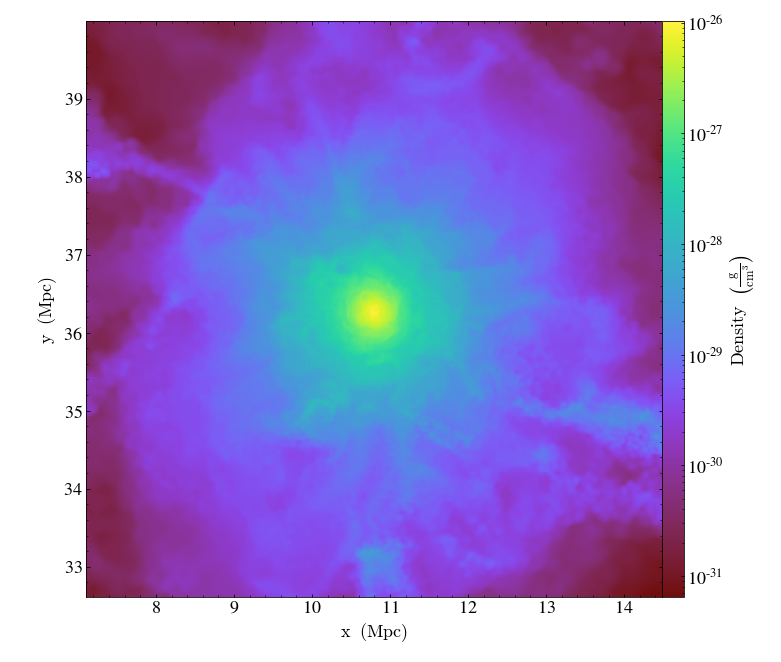

In [48]:
px3.show()